In [4]:
import keras
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.models import Model
import ipynb.fs.full.Structural_Perturbations as SP
import ipynb.fs.full.MultiTest as MT
tf.logging.set_verbosity(tf.logging.ERROR)
import sys
from keras.layers import Input, Dense, Lambda, merge,add,concatenate
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.models import load_model

Data has apparently already been downloaded and unpacked.


In [47]:
train_data,train_labels,eval_data,eval_labels = SP.load(data='mnist')

train_labels = keras.utils.to_categorical(train_labels, 10)
eval_labels = keras.utils.to_categorical(eval_labels, 10)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [27]:
class MNIST:
    def __init__(self):
        self.build_model()
        
    def build_model(self):
        self.inputs = Input(shape=(784, ),name='imgs')
        self.labels = Input((10,),name='labels')
        inputs = keras.layers.core.Reshape((28,28,1))(self.inputs)
        labels = self.labels

        conv1 = Conv2D(8, kernel_size=(3, 3),
                         activation='relu',
                         )(inputs)

        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

        conv2 = Conv2D(8, (3, 3), activation='relu')(pool1)

        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

        pool2_flat = Flatten()(pool2)

        dense1 = Dense(64, activation='relu')(pool2_flat)
        dropout = Dropout(0.5)(dense1)

        logits = Dense(10)(dropout)

        self.predictions = Activation('softmax')(logits)

        g = merge([logits, pool2, labels], mode=lambda x: K.gradients(x[0] * x[2], x[1]), output_shape=(pool2.shape))
        cost = merge([labels, self.predictions], mode=lambda x: (-1) * K.sum(x[0] * K.log(x[1]), axis=1), output_shape=labels.shape)
        gb_grad = merge([cost, inputs], mode=lambda x: K.gradients(x[0], x[1]), output_shape=(inputs.shape))

In [20]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

m = MNIST()

model = Model(inputs=[m.inputs, m.labels], outputs=[m.predictions])

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/uttaran/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/uttaran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [48]:
model = load_model('./keras/models/mnist_smaller.h5')

In [ ]:
model.fit([train_data,train_labels],train_labels,
          batch_size=256,
          epochs=10,
          verbose=1)
model.save('./keras/models/mnist_smaller.h5')
model.summary()

In [52]:
model.evaluate(eval_data,eval_labels)

10000/10000 [==============================] - 1s 68us/step


[0.4697696876049042, 0.8415]

In [50]:
eval_data = SP.Exposure(eval_data,80)

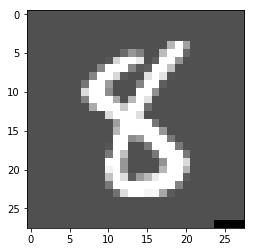

In [51]:
SP.Display(eval_data,344)